In [8]:
%pylab
%matplotlib inline

path = (os.path.abspath(os.path.join(r'..', os.pardir)))
import sys
sys.path.append(path)
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import cv2
from nuclei_segmentation import otsu as ot
from nuclei_segmentation import dicescore as dsc
from nuclei_segmentation import preprocessing as pp
from nuclei_segmentation import local_thresholding as lt
from nuclei_segmentation import two_level_otsu as tlo
from nuclei_segmentation import two_level_local_thresholding as tlo_l
import statistics as st
import os 
import os.path

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


d:\Anaconda\envs\dataanalysis0104_env\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
img_N2DH_GOWT1 = []
path = r"data/Otsu_data/N2DH-GOWT1/img"
for f in os.listdir(path):
    img_N2DH_GOWT1.append(imread(os.path.join(path , f)))

gt_N2DH_GOWT1 = []
path = r"data/Otsu_data/N2DH-GOWT1/gt"
for f in os.listdir(path):
    gt_N2DH_GOWT1.append(imread(os.path.join(path , f)))

In [5]:
img_N2DL_HeLa = []
path =  os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)),r"data/Otsu_data/N2DL-HeLa/img")
for f in os.listdir(path):
    img_N2DL_HeLa.append(imread(os.path.join(path , f)))

gt_N2DL_HeLa = []
path = os.path.join(os.path.abspath(os.path.join(r'..', os.pardir)), r"data/Otsu_data/N2DL-HeLa/gt")
for f in os.listdir(path):
    gt_N2DL_HeLa.append(imread(os.path.join(path , f)))

In [6]:
img = tlo_l.two_level_local_thresholding_mean(img_N2DL_HeLa[2],100,300)


In [10]:

gt= pp.binarize(gt_N2DL_HeLa[2])


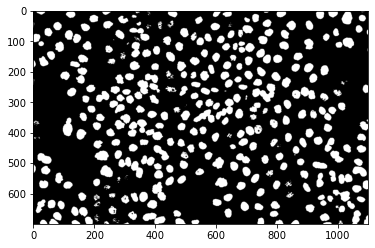

In [7]:
figure()
imshow(img,'gray')


In [11]:
print(dsc.dice(img,gt))

0.8645889919819213
